# Tutorial 0 - First JOOMMF notebook

The goal of this tutorial is for all participants to familiarise themselves with running JOOMMF simulations in Jupyter notebook. The only thing you need to know for this tutorial is how to execute individual cells: this is done by pressing `Shift` + `Return`.

## Simple JOOMMF simulation

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

We create a very simple system object and provide:

- Hamiltonian,
- dynamics, and
- magnetisation configuration.

In [2]:
system = oc.System(name="first_notebook")

We define the mesh by providing two points between which the domain spans as well as the size of the discretisation cell:

In [3]:
L = 100e-9  # cubic sample edge length (m)
d = 5e-9  # discretisation cell size (m)
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Our Hamiltonian should only contain exchange, demagnetisation, and Zeeman energy terms. We will apply the external magnetic field in the $x$ direction for the purpose of this demonstration:

In [4]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in x-direction (A/m)
system.hamiltonian = oc.Exchange(A=A) + oc.Demag() + oc.Zeeman(H=H)

The dynamics of the system is governed by the LLG equation containing precession and damping terms:

In [5]:
alpha = 0.2  # Gilbert damping
system.dynamics = oc.Precession(gamma=oc.gamma0) + oc.Damping(alpha=alpha)

We initialise the system in positive $y$ direction, i.e. (0, 1, 0), which is different from the equlibrium state we expect for the external Zeeman field applied in $x$ direction:

In [6]:
Ms = 8e6  # saturation magnetisation (A/m)
system.m = df.Field(mesh, value=(0, 1, 0), norm=Ms)

We can check the characteristics of the system we defined by asking objects to represent themselves:

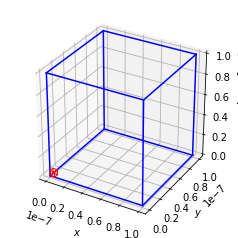

In [7]:
mesh

In [8]:
system.hamiltonian

Exchange(A=1e-12) + Demag() + Zeeman(H=(5000000.0, 0, 0))

In [9]:
system.dynamics

Precession(gamma=221276.14872118403) + Damping(alpha=0.2)

We can also visualise the current magnetisation field:

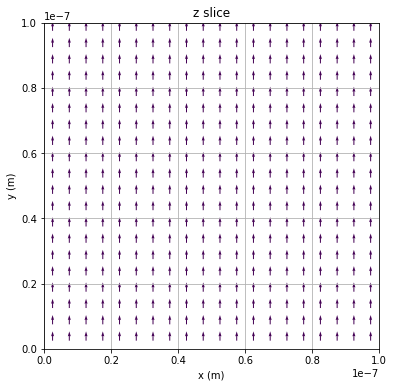

In [13]:
fig = system.m.plot_slice("z", 50e-9, xsize=6)

After the system object is created, we can minimise its energy (relax it) using the Minimisation Driver (`MinDriver`).

In [14]:
md = oc.MinDriver()
md.drive(system)

2017/4/4 16:57: Calling OOMMF (first_notebook/first_notebook.mif) ... [4.2s]


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

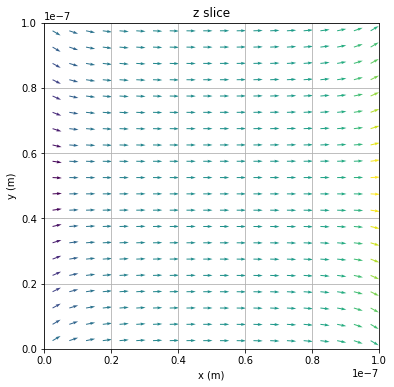

In [16]:
fig = system.m.plot_slice("z", 50e-9, xsize=6)

In [13]:
system.m.average

(7859967.9806671832, 0.00067647194769233465, -6.0535967350006106e-11)

We can see that the magnetisation is aligned along the $x$ direction, as expected having in mind we applied the external magnetic field in that direction.

### Exercise

- Change the direction of the applied field and re-run the simulation.
- Can you export the Notebook file as html? (Hint: `File` -> `Download as`)
- Play around with the notebook.